### Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import Normalizer
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import itertools

### Импорт данных

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Бинарный классификатор/data.csv')

In [3]:
data = data.drop(['Unnamed: 0','Minior'],axis = 1)

### Корреляция переменных с целевой

In [4]:
data_corr = list(abs(data.corr().case))[:-1]
data_names = list(data.columns)[:-1]
correlations = dict()
for i in range(len(data_corr)):
  correlations[data_corr[i]] = data_names[i]
correlations

{0.13155276485902168: 'Fault_20',
 0.08068316415599841: 'FWL',
 0.00903718025539247: 'Corey_O_W',
 0.2076421709263051: 'Corey_water',
 0.011809393562871428: 'Krw_Sorw',
 0.04875987876843498: 'gamma_poro',
 0.22051575368644002: 'beta_poro',
 0.1326650806372804: 'LN_gamma_perm',
 0.1977541159577165: 'LN_beta_perm',
 0.07736362914904688: 'LN_gamma_swcr',
 0.01261101357635721: 'LN_beta_swl',
 0.036358210600326665: 'cos_teta',
 0.10164776702735867: 'LN_gamma_sw',
 0.020718568885618304: 'LN_beta_sw',
 0.0016359573071454243: 'ANI',
 0.029874951559475754: 'Azimuth',
 0.05286171990754219: 'Major',
 0.135739624032603: 'Vertical'}

In [5]:
sorted_corr = sorted(correlations.items(),reverse = True)
sorted_corr

[(0.22051575368644002, 'beta_poro'),
 (0.2076421709263051, 'Corey_water'),
 (0.1977541159577165, 'LN_beta_perm'),
 (0.135739624032603, 'Vertical'),
 (0.1326650806372804, 'LN_gamma_perm'),
 (0.13155276485902168, 'Fault_20'),
 (0.10164776702735867, 'LN_gamma_sw'),
 (0.08068316415599841, 'FWL'),
 (0.07736362914904688, 'LN_gamma_swcr'),
 (0.05286171990754219, 'Major'),
 (0.04875987876843498, 'gamma_poro'),
 (0.036358210600326665, 'cos_teta'),
 (0.029874951559475754, 'Azimuth'),
 (0.020718568885618304, 'LN_beta_sw'),
 (0.01261101357635721, 'LN_beta_swl'),
 (0.011809393562871428, 'Krw_Sorw'),
 (0.00903718025539247, 'Corey_O_W'),
 (0.0016359573071454243, 'ANI')]

### Балансировка данных

In [6]:
X = data.drop(['case'],axis = 1)
y = data.case

In [7]:
data.case.value_counts()

0    395
1      5
Name: case, dtype: int64

In [8]:
smote = SMOTE(k_neighbors = 3)
smote.fit(X,y)
X_sm, y_sm = smote.fit_resample(X, y)

### Поиск оптимального количества параметров

In [21]:
res = list()

In [22]:
for i in range(1,9):

  combin = list(itertools.combinations(list(X_sm.columns),i))

  best_score = 0
  best_comb = list()
  
  for j in range(len(combin)):
    parameters = list(combin[j])
    X_tr = X_sm[parameters]

    transformer = Normalizer().fit(X_tr) 
    X_new = transformer.transform(X_tr)

    clf = RandomForestClassifier(random_state=0)
    scores = cross_val_score(clf,X_new,y_sm)

    if scores.mean() > best_score:
      best_score = scores.mean()
      print(best_score)
      best_comb = parameters
      print(best_comb)

  res.append([best_score,best_comb])
    

0.5151898734177215
['Fault_20']
0.6088607594936709
['LN_gamma_perm']
0.6911392405063292
['Fault_20', 'FWL']
0.8443037974683543
['Fault_20', 'Corey_water']
0.9417721518987342
['FWL', 'Corey_water']
0.858227848101266
['Fault_20', 'FWL', 'Corey_O_W']
0.9582278481012658
['Fault_20', 'FWL', 'Corey_water']
0.9645569620253165
['Fault_20', 'Corey_O_W', 'Corey_water']
0.9708860759493672
['Fault_20', 'Corey_water', 'beta_poro']
0.9746835443037973
['Fault_20', 'Corey_water', 'LN_beta_perm']
0.9873417721518987
['FWL', 'Corey_water', 'beta_poro']
0.9645569620253165
['Fault_20', 'FWL', 'Corey_O_W', 'Corey_water']
0.9721518987341773
['Fault_20', 'FWL', 'Corey_O_W', 'beta_poro']
0.978481012658228
['Fault_20', 'FWL', 'Corey_water', 'Krw_Sorw']
0.9898734177215189
['Fault_20', 'FWL', 'Corey_water', 'beta_poro']
0.9924050632911392
['FWL', 'Corey_water', 'Krw_Sorw', 'beta_poro']
0.9810126582278482
['Fault_20', 'FWL', 'Corey_O_W', 'Corey_water', 'Krw_Sorw']
0.9898734177215189
['Fault_20', 'FWL', 'Corey_O_W'

In [23]:
result = []

In [24]:
for i in res:
  result.append(i[0])

Text(0, 0.5, 'Точность модели')

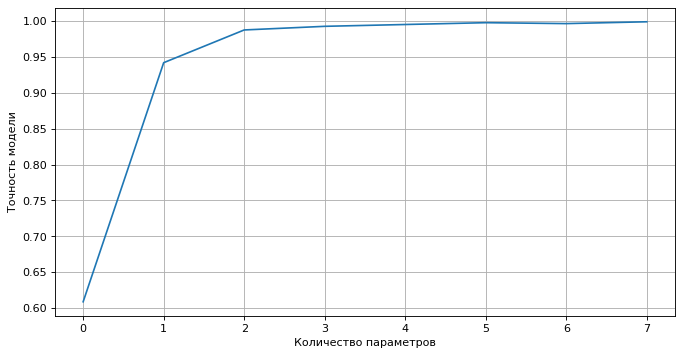

In [25]:
fig, ax = plt.subplots(figsize=(10,5), dpi= 80)    
plt.plot(result)
plt.grid() 
plt.xlabel('Количество параметров')
plt.ylabel('Точность модели')

### Тестирование моделей

In [40]:
X_ = X_sm[res[3][1]]
y_ = y_sm

In [41]:
transformer = Normalizer().fit(X_) 
X_new = transformer.transform(X_)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_, test_size=0.4, random_state=42)

### Тестирование различных моделей

In [43]:
clf = svm.SVC()
scores = cross_val_score(clf, X_new, y_sm, cv=5,scoring='recall_macro')
print(scores.mean())
scores = cross_val_score(clf, X_new, y_sm, cv=5,scoring='precision_macro')
print(scores.mean())
scores = cross_val_score(clf, X_new, y_sm, cv=5,scoring='f1_macro')
print(scores.mean())
scores = cross_val_score(clf, X_new, y_sm, cv=5)
print(scores.mean())

0.830379746835443
0.8809017644419359
0.8193942514115612
0.830379746835443


In [44]:
clf = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(clf, X_new, y_sm, cv=5,scoring='recall_macro')
print(scores.mean())
scores = cross_val_score(clf, X_new, y_sm, cv=5,scoring='precision_macro')
print(scores.mean())
scores = cross_val_score(clf, X_new, y_sm, cv=5,scoring='f1_macro')
print(scores.mean())
scores = cross_val_score(clf, X_new, y_sm, cv=5)
print(scores.mean())

0.9582278481012658
0.965370927051941
0.957589432933449
0.9582278481012658


In [45]:
clf = RandomForestClassifier(max_depth=4, random_state=0)
scores = cross_val_score(clf, X_new, y_sm, cv=5,scoring='recall_macro')
print(scores.mean())
scores = cross_val_score(clf, X_new, y_sm, cv=5,scoring='precision_macro')
print(scores.mean())
scores = cross_val_score(clf, X_new, y_sm, cv=5,scoring='f1_macro')
print(scores.mean())
scores = cross_val_score(clf, X_new, y_sm, cv=5)
print(scores.mean())

0.9924050632911392
0.9925561617458281
0.9924027299935061
0.9924050632911392


In [46]:
clf = MLPClassifier(random_state=1,max_iter = 500)
scores = cross_val_score(clf, X_new, y_sm, cv=5,scoring='recall_macro')
print(scores.mean())
scores = cross_val_score(clf, X_new, y_sm, cv=5,scoring='precision_macro')
print(scores.mean())
scores = cross_val_score(clf, X_new, y_sm, cv=5,scoring='f1_macro')
print(scores.mean())
scores = cross_val_score(clf, X_new, y_sm, cv=5)
print(scores.mean())

0.5


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Pr

0.25
0.3333333333333333
0.5
